---
<center><h1>Feature Selection & Dimensionality Reduction</h1></center>

---

## Project - 

**About the Dataset:**
##### A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high volume products from last month.
##### The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

![](DS_C4_Project.jpg)

#### Answer the following questions:
#### Q1. Check the correlation matrix and identify most correlated features.
#### Q2. Find out the Covariance Matrix? Also Identify eigen values and eigen vectors of covariance matrix.
#### Q3. Find out the two most important Principal Components.
#### Q4. Select only 8 features using PCA.

### Importing Libraries

In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv('Problem Statement - Dimentionality Reduction-Dataset.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Data Preprocessing

In [4]:
# dropping the Product_ID variable
data = data.drop('Product_ID', axis = 1)

In [5]:
#shape of the data
data.shape

(550068, 11)

In [6]:
# Checking the type of each variable
data.dtypes

User_ID                         int64
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
# percentage of missing values in each variable
a = data.isnull().sum()/len(data)*100
a

User_ID                        0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [8]:
# saving column names in a variable
variables = data.columns

In [9]:
# new variable to store variables having missing values less than a threshold
variable = []
for i in range(data.columns.shape[0]):
    # Setting the threshold as 60%
    if a[i]<=60:
        variable.append(variables[i])

In [10]:
variable

['User_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Purchase']

In [11]:
# creating a new dataframe using the above variables
new_data = data[variable]
new_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,7969


In [12]:
# percentage of missing values in each variable of new data
new_data.isnull().sum()/len(new_data)*100

User_ID                        0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Purchase                       0.000000
dtype: float64

In [13]:
# Imputing the remaining missing values with the median of Product_Category_2
new_data = new_data.fillna(new_data['Product_Category_2'].median())

In [14]:
# percentage of missing values in each variable of new data
new_data.isnull().sum()/len(new_data)*100

User_ID                       0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Purchase                      0.0
dtype: float64

In [15]:
# Importing Label Encoder for converting the categorical values to numeric value
from sklearn.preprocessing import LabelEncoder

In [16]:
# Transforming each feature
le = LabelEncoder()
label_gender = le.fit_transform(new_data['Gender'])
label_age = le.fit_transform(new_data['Age'])
label_city_category = le.fit_transform(new_data['City_Category'])
label_Stay_In_Current_City_Years = le.fit_transform(new_data['Stay_In_Current_City_Years'])

In [17]:
# Storing the generated label in their respective columns
new_data['Gender'] = label_gender
new_data['Age'] = label_age
new_data['City_Category'] = label_city_category
new_data['Stay_In_Current_City_Years'] = label_Stay_In_Current_City_Years

In [18]:
new_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,0,0,10,0,2,0,3,9.0,8370
1,1000001,0,0,10,0,2,0,1,6.0,15200
2,1000001,0,0,10,0,2,0,12,9.0,1422
3,1000001,0,0,10,0,2,0,12,14.0,1057
4,1000002,1,6,16,2,4,0,8,9.0,7969


### Q1. Check the correlation matrix and identify most correlated features.

In [19]:
# Dropping the target variable
df = new_data.drop('Purchase',axis=1)

In [20]:
# Calculalting the correlation between independent variables
df.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.001644
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.014051
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.043503
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.000557
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.006888
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.001087
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.011526
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.331691
Product_Category_2,0.001644,-0.014051,0.043503,0.000557,-0.006888,-0.001087,0.011526,0.331691,1.000000


In [21]:
# creating correlation matrix
corr_matrix = df.corr().abs()

In [22]:
# selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [23]:
upper

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
User_ID,NaN,0.033474,0.032698,0.023971,0.022859,0.030737,0.020443,0.003825,0.001644
Gender,NaN,NaN,0.004262,0.117291,0.004515,0.014660,0.011603,0.045594,0.014051
Age,NaN,NaN,NaN,0.091463,0.123079,0.004712,0.311738,0.061197,0.043503
Occupation,NaN,NaN,NaN,NaN,0.034479,0.030005,0.024280,0.007618,0.000557
City_Category,NaN,NaN,NaN,NaN,NaN,0.019946,0.039790,0.014364,0.006888
Stay_In_Current_City_Years,NaN,NaN,NaN,NaN,NaN,NaN,0.012819,0.004213,0.001087
Marital_Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019888,0.011526
Product_Category_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.331691
Product_Category_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# finding index of variables with correlation greater than 0.3
high_corr = [column for column in upper.columns if any(upper[column] >= 0.3)]
high_corr

['Marital_Status', 'Product_Category_2']

##### After checking the correlation matrix, the most correlated features are **`Product_Category_2`** and **`Marital_Status`**.

---

### Q2. Find out the Covariance Matrix. Also Identify eigen values and eigen vectors of covariance matrix.

In [25]:
# Chcking the preprocessed data
new_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,0,0,10,0,2,0,3,9.0,8370
1,1000001,0,0,10,0,2,0,1,6.0,15200
2,1000001,0,0,10,0,2,0,12,9.0,1422
3,1000001,0,0,10,0,2,0,12,14.0,1057
4,1000002,1,6,16,2,4,0,8,9.0,7969


In [26]:
# Standardise the data
scaler = StandardScaler()
new_data_scale = scaler.fit_transform(new_data)

In [27]:
# Creating the dataframe
new_data_scale_df = pd.DataFrame(new_data_scale, columns = new_data.columns)

In [28]:
# Finding the covariance of the dataframe
cov_matrix = new_data_scale_df.cov()

###### Covariance matrix

In [29]:
cov_matrix

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000002,-0.033475,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.001644,0.004716
Gender,-0.033475,1.000002,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.014051,0.060346
Age,0.032698,-0.004262,1.000002,0.091463,0.123079,-0.004712,0.311739,0.061197,0.043503,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000002,0.034479,0.030005,0.024280,-0.007618,0.000557,0.020833
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000002,0.019946,0.039791,-0.014364,-0.006888,0.061914
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000002,-0.012819,-0.004213,-0.001087,0.005422
Marital_Status,0.020443,-0.011603,0.311739,0.024280,0.039791,-0.012819,1.000002,0.019888,0.011526,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000002,0.331692,-0.343704
Product_Category_2,0.001644,-0.014051,0.043503,0.000557,-0.006888,-0.001087,0.011526,0.331692,1.000002,-0.156677
Purchase,0.004716,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343704,-0.156677,1.000002


###### Finding Eigenvalue and Eigenvectors of the covariance matrix -

In [30]:
# Storing the eigenvalue and eigenvectors using np.linalg.eig() of the above covariance matrix
eig_val, eig_vect = np.linalg.eig(cov_matrix)

###### Eigenvalue

In [31]:
eig_val = pd.DataFrame(eig_val, index = cov_matrix.columns, columns = ['eigenvalue'])
eig_val

,eigenvalue
User_ID,1.583718
Gender,1.379254
Age,0.589124
Occupation,0.670076
City_Category,1.132216
Stay_In_Current_City_Years,1.006703
Marital_Status,0.989530
Product_Category_1,0.945454
Product_Category_2,0.825413
Purchase,0.878530


###### Eigenvectors

In [32]:
eig_vect = pd.DataFrame(eig_vect, index = cov_matrix.columns)
eig_vect

,0,1,2,3,4,5,6,7,8,9
User_ID,-0.020528,0.087088,-0.001111,0.026208,0.373260,0.180454,-0.725972,0.540200,0.022953,0.006434
Gender,0.127431,0.072567,-0.007250,-0.034222,-0.609682,0.346632,-0.155980,0.070346,0.309485,0.600289
Age,-0.134403,0.659611,-0.162946,-0.706659,0.064982,0.013066,0.118330,0.033666,-0.035993,0.010351
Occupation,0.031374,0.254132,0.023786,0.145101,-0.584471,0.167991,-0.187780,0.063903,-0.166564,-0.689852
City_Category,0.043183,0.331565,-0.015931,0.176594,0.027412,-0.427231,-0.490568,-0.607068,0.248431,0.050757
Stay_In_Current_City_Years,0.021186,0.007849,0.000714,-0.005612,-0.296909,-0.791373,0.040883,0.523074,0.000438,0.098759
Marital_Status,-0.103541,0.592367,0.099300,0.633751,0.169918,0.097769,0.356267,0.193670,0.082645,0.131091
Product_Category_1,-0.635052,-0.044882,0.751069,-0.117694,-0.083014,-0.011968,-0.066690,-0.040535,0.054991,0.024265
Product_Category_2,-0.518402,-0.017903,-0.408987,0.170766,-0.133585,-0.006861,-0.146472,-0.104654,-0.634159,0.286445
Purchase,0.528417,0.155725,0.480978,-0.043026,0.024898,-0.018547,-0.064926,-0.076007,-0.633185,0.226836


## Q3. Find out the two most important Principal Components.

In [33]:
# Taking the absolute values of the eigenvalue
eig_val_magnitude = eig_val.abs()

In [34]:
# Sorting the values in it's incresing order
eig_val_magnitude = eig_val_magnitude.sort_values('eigenvalue', ascending = False)

In [35]:
eig_val_magnitude

,eigenvalue
User_ID,1.583718
Gender,1.379254
City_Category,1.132216
Stay_In_Current_City_Years,1.006703
Marital_Status,0.989530
Product_Category_1,0.945454
Purchase,0.878530
Product_Category_2,0.825413
Occupation,0.670076
Age,0.589124


In [36]:
# total sum of the eigenvalue
addition = sum(eig_val_magnitude['eigenvalue'])

In [37]:
# Finding the contribution of each eigenvalue by iterating and storing them in a list var_percent
var_percent = []
for i in range(len(eig_val_magnitude)):
    a = eig_val_magnitude['eigenvalue'][i]/addition
    var_percent.append(a)

In [38]:
# Creating a datframe
var_percent = pd.DataFrame(var_percent, index = cov_matrix.columns, columns = ['%contribution'])

In [39]:
var_percent

,%contribution
User_ID,0.158372
Gender,0.137925
Age,0.113221
Occupation,0.100670
City_Category,0.098953
Stay_In_Current_City_Years,0.094545
Marital_Status,0.087853
Product_Category_1,0.082541
Product_Category_2,0.067007
Purchase,0.058912


###### From the above values of variance obtained, we can observe that two of the most important Principal Components are **`User_ID`** and **`Gender`**.

---

## Q4. Select only 8 features using PCA.

In [40]:
# checking the scaled data
new_data_scale_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,-1.752639,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-0.610809,-0.136401,-0.177973
1,-1.752639,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-1.118912,-0.846289,1.181756
2,-1.752639,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,-0.136401,-1.561193
3,-1.752639,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,1.046745,-1.633858
4,-1.752061,0.572570,2.588277,1.214734,1.259336,1.660861,-0.833018,0.659449,-0.136401,-0.257805


In [41]:
# Segragating the features and target variables
X = new_data_scale_df.drop('Purchase', axis =1)
y = new_data_scale_df['Purchase']

In [42]:
# Creating the training and validation set

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 10, test_size =0.25)

In [43]:
# Fitting the PCA algorithm on our data to find the appropriate number of principal components to keep
pca = PCA().fit(X_train)

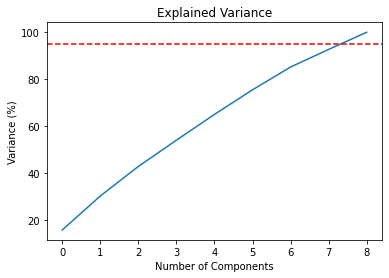

In [44]:
# Plotting the cumulative summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

#  We want to preserve 95% of the variance, so plot a horizontal line at 95% variance
plt.axhline(y = 95, color = 'r', linestyle = '--')
plt.show()

In [45]:
# Transforming the originaltrain and validation set to 8 components
# Fit on the training data
pca = PCA(8).fit(X_train)

# Transform both training and validation data
X_train_transformed = pca.transform(X_train)
X_valid_transformed = pca.transform(X_valid)

In [46]:
# checking the shape after taking 8 components
X_train_transformed.shape

(412551, 8)

In [47]:
# Creating Random Forest Regressor model
model = RandomForestRegressor(random_state = 1, max_depth = 3, n_estimators = 100)

In [48]:
# Fitting the same random forest model on same data
model.fit(X_train_transformed, y_train)

RandomForestRegressor(max_depth=3, random_state=1)

In [49]:
# Predicting for the transformed validation set
pred_2 = model.predict(X_valid_transformed)

In [50]:
# Checking the training performance after transformation
mse(model.predict(X_train_transformed), y_train)

0.8729193423058577

In [51]:
# Checking the validation performance after transformation
mse(pred_2, y_valid)

0.8739620028423317